# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [9]:
X[36000, :]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

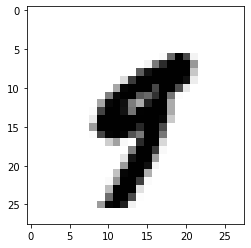

In [13]:
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(X[36000,:].reshape(28,28), cmap= matplotlib.cm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [15]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [16]:
X_train = X[:60000,:]
X_test = X[60000:,:]
y_train = y[:60000]
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [20]:
from collections import Counter
Counter(y)

Counter({'5': 6313,
         '0': 6903,
         '4': 6824,
         '1': 7877,
         '9': 6958,
         '2': 6990,
         '3': 7141,
         '6': 6876,
         '7': 7293,
         '8': 6825})

In [33]:
y_5 = []
for i in y:
    if i =='5':
        y_5.append(1)
    else:
        y_5.append(0)
Counter(y_5)

Counter({1: 6313, 0: 63687})

In [43]:
y_5_train = y_5[:60000]
y_5_test = y_5[60000:]

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs=-1)
model.fit(X_train, y_5_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Does the classifier predict correctly the 36000th digit we picked before?

In [48]:
model.predict(X_test)[:50] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0])

In [49]:
y_test[:50]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9', '0', '6', '9',
       '0', '1', '5', '9', '7', '3', '4', '9', '6', '6', '5', '4', '0',
       '7', '4', '0', '1', '3', '1', '3', '4', '7', '2', '7', '1', '2',
       '1', '1', '7', '4', '2', '3', '5', '1', '2', '4', '4'],
      dtype=object)

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [50]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [56]:
never_5_clf.fit(X_train)
never_5_clf.predict(X_test)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [73]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, precision_score, recall_score, f1_score
confusion_matrix(y_5_test, model.predict(X_test))

array([[9034,   74],
       [ 147,  745]], dtype=int64)

In [75]:
print(f'The precision score for the model is: {precision_score(y_5_test, model.predict(X_test))}. \nThe recall score for the model is:{recall_score(y_5_test, model.predict(X_test))}. \nThe F1 score for the model is:{f1_score(y_5_test, model.predict(X_test))}.')

The precision score for the model is: 0.9096459096459096. 
The recall score for the model is:0.8352017937219731. 
The F1 score for the model is:0.8708357685563999.


In [88]:
# The probability cutoff is set as default to 50%. However, this can be optimized by using predict_proba method. If the 
# Idea is to improve recall what has to be done is reducing the threshold. To improve precision, increase the threshold.

In [155]:
y_pred = model.predict_proba(X_test)[:, 1] > 0.362
y_pred

array([False, False, False, ..., False,  True, False])

In [157]:
confusion_matrix(y_5_test, y_pred)

array([[8984,  124],
       [ 123,  769]], dtype=int64)

In [156]:
print(f'The precision score for the model is: {precision_score(y_5_test, y_pred)}. \nThe recall score for the model is:{recall_score(y_5_test, y_pred)}. \nThe F1 score for the model is:{f1_score(y_5_test, y_pred)}.')

The precision score for the model is: 0.8611422172452408. 
The recall score for the model is:0.8621076233183856. 
The F1 score for the model is:0.861624649859944.


In [ ]:
# To improve F1 score, let's do some experiments.

In [149]:
y_pred = model.predict_proba(X_test)[:, 1] > 0.511
y_pred

array([False, False, False, ..., False,  True, False])

In [130]:
confusion_matrix(y_5_test, y_pred)

array([[9034,   74],
       [ 147,  745]], dtype=int64)

In [150]:
print(f'The precision score for the model is: {precision_score(y_5_test, y_pred)}. \nThe recall score for the model is:{recall_score(y_5_test, y_pred)}. \nThe F1 score for the model is:{f1_score(y_5_test, y_pred)}.')

The precision score for the model is: 0.9137931034482759. 
The recall score for the model is:0.8318385650224215. 
The F1 score for the model is:0.8708920187793427.


In [87]:
confusion_matrix(y_5_test, never_5_clf.predict(X_test))

array([[9108,    0],
       [ 892,    0]], dtype=int64)

In [151]:
print(f'The precision score for the model is: {precision_score(y_5_test, never_5_clf.predict(X_test))}. \nThe recall score for the model is:{recall_score(y_5_test, never_5_clf.predict(X_test))}. \nThe F1 score for the model is:{f1_score(y_5_test, never_5_clf.predict(X_test))}.')

The precision score for the model is: 0.0. 
The recall score for the model is:0.0. 
The F1 score for the model is:0.0.


C:\Users\Alvaro Camacho\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


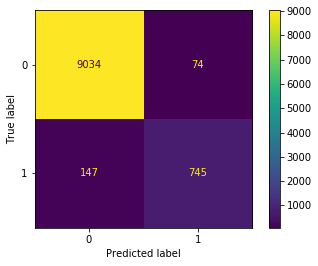

In [154]:
plot_confusion_matrix(model, X_test, y_5_test, values_format='.0f')


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# Definitely the dumb model doesn't work well at all. The logistic regression model can be set according to
# the needs.

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

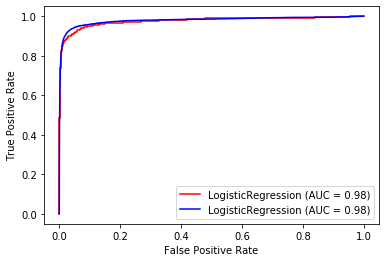

In [159]:
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
fig, ax = plt.subplots()

plot_roc_curve(model, X_test, y_5_test, color='red', ax= ax)
plot_roc_curve(model, X_train, y_5_train, color='blue', ax=ax)

### Now find the roc_auc_score for each. 

In [160]:
roc_auc_score(y_5_test, model.predict_proba(X_test)[:, 1])

0.9760923231141597

In [161]:
roc_auc_score(y_5_train, model.predict_proba(X_train)[:, 1])

0.9792999057408999

### Using the yellowbrick library  plot the roc_auc_score curve for the logistic model . 

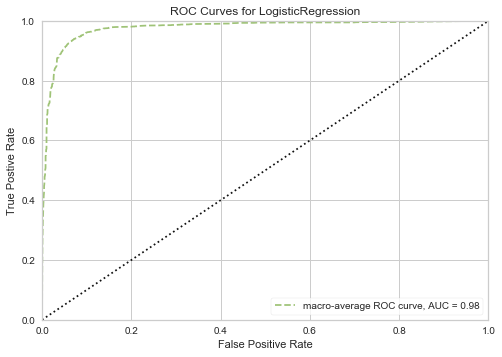

In [164]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(model, classes=["non-default", "default"], micro=False, per_class=False)
visualizer.fit(X_train, y_5_train)        
visualizer.score(X_test, y_5_test)        
visualizer.show()                       

### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# By far, the classifier that works best is the logistic regression.